In [1]:
import random
import warnings
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def init_graph(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    return G

In [3]:
def create_graph(n, fn):
    # Create graph with given number of nodes
    G = init_graph(n)
    
    # While G is not connected
    while not fn(G):
        # Sample 2 nodes from G
        a, b = random.sample(list(G), 2)
        
        # Add edge
        G.add_edge(a, b)
        
    return G

In [4]:
def draw_graph(G, output_dir=None):
    nx.draw(G)
    
    if output_dir is not None:
        plt.savefig(output_dir)

In [5]:
def draw_plot(x, y, figsize=(14, 8), output_dir=None):
    plt.figure(figsize=figsize)
    plt.xlabel('Nodes')
    plt.ylabel('Average edges')
    
    r = range(10, 110, 10)
    plt.grid(True)
    
    g, = plt.plot(x, y, marker='o', label='g(x)')    
    x1, = plt.plot(r, list(map(lambda x: x, r)), linestyle='--', label='f(x) = x')
    x2, = plt.plot(r, list(map(lambda x: 2*x, r)), linestyle='--', label='f(x) = 2x')
    x3, = plt.plot(r, list(map(lambda x: 3*x, r)), linestyle='--', label='f(x) = 3x')
    plt.legend(handles=[g, x1, x2, x3])
    
    if output_dir is not None:
        plt.savefig(output_dir)

In [6]:
def create_rand_component(n, trials, fn):
    # Sum the number of edges
    total = sum([
        create_graph(n, fn).number_of_edges()
        for _ in range(trials)
    ])
    
    print('{:>3} nodes => {:>5} edges'.format(n, total / trials))
    
    return total / trials

In [7]:
def main():
    step = 10
    begin = 10
    end = 100 + step
    trials = 10
    cond = lambda x : nx.is_connected(x)
    
    results = [
        (n, create_rand_component(n, trials, cond))
        for n in range(begin, end, step)
    ]
    
    x, y = list(zip(*results))

    draw_plot(x, y)

 10 nodes =>  13.8 edges
 20 nodes =>  28.8 edges
 30 nodes =>  56.7 edges
 40 nodes =>  81.4 edges
 50 nodes => 106.6 edges
 60 nodes => 127.3 edges
 70 nodes => 160.3 edges
 80 nodes => 181.7 edges
 90 nodes => 248.9 edges
100 nodes => 235.5 edges


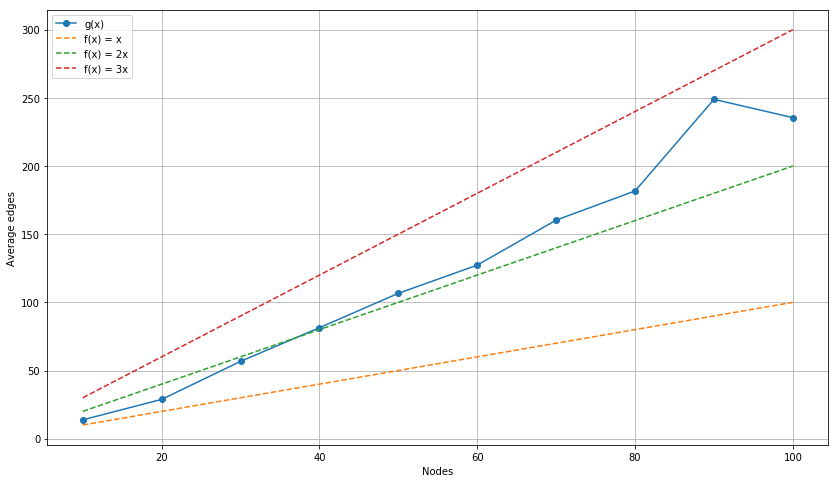

In [8]:
if __name__ == '__main__':
    main()